https://curiousily.com/posts/object-detection-on-custom-dataset-with-yolo-v5-using-pytorch-and-python/

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#!pip install PyYAML==5.3.1

In [2]:
!git clone https://github.com/NVIDIA/apex && cd apex && pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" . --user && cd .. && rm -rf apex

Clonando en 'apex'...
remote: Enumerating objects: 1, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 7456 (delta 0), reused 0 (delta 0), pack-reused 7455
Recibiendo objetos: 100% (7456/7456), 13.91 MiB | 2.90 MiB/s, listo.
Resolviendo deltas: 100% (5038/5038), listo.
/Users/julian/opt/anaconda3/lib/python3.7/site-packages/pip/_internal/commands/install.py:235: UserWarning: Disabling all use of wheels due to the use of --build-option / --global-option / --install-option.
  cmdoptions.check_install_build_global(options)
Using pip 20.2.3 from /Users/julian/opt/anaconda3/lib/python3.7/site-packages/pip (python 3.7)
User install by explicit request
Created temporary directory: /private/var/folders/by/t7qyz4pn5jsg1132688qnk780000gn/T/pip-ephem-wheel-cache-kypuzr4w
Created temporary directory: /private/var/folders/by/t7qyz4pn5jsg1132688qnk780000gn/T/pip-req-tracker-z9tm44bw
Initialized build tracking at /private/var/folders/by/t7qyz4pn5jsg1132688qnk780000gn/T/pip-req-tracker-

  Found link https://files.pythonhosted.org/packages/3f/ef/935d9296acc4f48d1791ee56a73781271dce9712b059b475d3f5fa78487b/pip-9.0.0-py2.py3-none-any.whl#sha256=c856ac18ca01e7127456f831926dc67cc7d3ab663f4c13b1ec156e36db4de574 (from https://pypi.org/simple/pip/) (requires-python:>=2.6,!=3.0.*,!=3.1.*,!=3.2.*), version: 9.0.0
  Found link https://files.pythonhosted.org/packages/5e/53/eaef47e5e2f75677c9de0737acc84b659b78a71c4086f424f55346a341b5/pip-9.0.0.tar.gz#sha256=f62fb70e7e000e46fce12aaeca752e5281a5446977fe5a75ab4189a43b3f8793 (from https://pypi.org/simple/pip/) (requires-python:>=2.6,!=3.0.*,!=3.1.*,!=3.2.*), version: 9.0.0
  Found link https://files.pythonhosted.org/packages/b6/ac/7015eb97dc749283ffdec1c3a88ddb8ae03b8fad0f0e611408f196358da3/pip-9.0.1-py2.py3-none-any.whl#sha256=690b762c0a8460c303c089d5d0be034fb15a5ea2b75bdf565f40421f542fefb0 (from https://pypi.org/simple/pip/) (requires-python:>=2.6,!=3.0.*,!=3.1.*,!=3.2.*), version: 9.0.1
  Found link https://files.pythonhosted.org/p

  Found link https://files.pythonhosted.org/packages/bd/b1/56a834acdbe23b486dea16aaf4c27ed28eb292695b90d01dff96c96597de/pip-20.2.1-py2.py3-none-any.whl#sha256=7792c1a4f60fca3a9d674e7dee62c24e21a32df1f47d308524d3507455784f29 (from https://pypi.org/simple/pip/) (requires-python:>=2.7,!=3.0.*,!=3.1.*,!=3.2.*,!=3.3.*,!=3.4.*), version: 20.2.1
  Found link https://files.pythonhosted.org/packages/68/1a/8cfcf3a8cba0dd0f125927c986b1502f2eed284c63fdfd6797ea74300ae4/pip-20.2.1.tar.gz#sha256=c87c2b2620f2942dfd5f3cf1bb2a18a99ae70de07384e847c8e3afd1d1604cf2 (from https://pypi.org/simple/pip/) (requires-python:>=2.7,!=3.0.*,!=3.1.*,!=3.2.*,!=3.3.*,!=3.4.*), version: 20.2.1
  Found link https://files.pythonhosted.org/packages/5a/4a/39400ff9b36e719bdf8f31c99fe1fa7842a42fa77432e584f707a5080063/pip-20.2.2-py2.py3-none-any.whl#sha256=5244e51494f5d1dfbb89da492d4250cb07f9246644736d10ed6c45deb1a48500 (from https://pypi.org/simple/pip/) (requires-python:>=2.7,!=3.0.*,!=3.1.*,!=3.2.*,!=3.3.*,!=3.4.*), version

In [20]:
#!gdown --id 1uWdQ2kn25RSQITtBHa9_zayplm27IXNC

/bin/sh: tree: command not found


In [1]:
from pathlib import Path
from tqdm import tqdm
import numpy as np
import pandas as pd
import json
import urllib
import PIL.Image as Image
import cv2
import torch
import torchvision
from IPython.display import display
from sklearn.model_selection import train_test_split
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
rcParams['figure.figsize'] = 16, 10
np.random.seed(42)

/Users/julian/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data Preparation

In [2]:
cd ..

/Users/julian/Desktop/Projects/DeepLogo


In [44]:
df = pd.read_csv('data/video-files/F1/R-Yq1AlIwsc/output/annotations.csv', index_col=[0])
df.iloc[10001:10006]

,seconds,micro,frame,logo,x1,y1,x2,y2,x3,y3,x4,y4,conficence
518,365.0,0.52,4570,Petronas,763,180,1146,180,1146,424,763,424,0.886789
9989,365.0,0.52,4570,Mercedes-Benz,203,160,310,160,310,230,203,230,0.947379
507,365.0,0.52,4570,Petronas,757,348,1132,348,1132,424,757,424,0.955808
508,365.0,0.64,4571,Petronas,756,358,1140,358,1140,425,756,425,0.955808
9947,365.0,0.64,4571,Mercedes-Benz,870,186,1031,186,1031,328,870,328,0.969055


In [3]:
from src.utils import concatenate_anno, zip_dir
df_anno = concatenate_anno('data/video-files/F1/')

data/video-files/F1/TB5yhZdF8SI/output/data.csv
Concatenating data/video-files/F1/TB5yhZdF8SI/output/data.csv
data/video-files/F1/TB5yhZdF8SI/output/annotations.csv
data/video-files/F1/R-Yq1AlIwsc/output/data.csv
Concatenating data/video-files/F1/R-Yq1AlIwsc/output/data.csv
data/video-files/F1/R-Yq1AlIwsc/output/annotations.csv
data/video-files/F1/EmZtTd1YRmA/output/data.csv
Concatenating data/video-files/F1/EmZtTd1YRmA/output/data.csv
data/video-files/F1/EmZtTd1YRmA/output/annotations.csv
data/video-files/F1/2femix89pTE/output/data.csv
Concatenating data/video-files/F1/2femix89pTE/output/data.csv
data/video-files/F1/2femix89pTE/output/df_anno.csv
data/video-files/F1/2femix89pTE/output/annotations.csv
Data concatenated. 49007 annotations were appended


,filename,widht,height,class,xmin,ymin,xmax,ymax,new_path,new_bb
0,data/video-files/F1/TB5yhZdF8SI/input/frames/f...,0.0,0.0,None,0.0,0.0,0.0,0.0,data/video-files/F1/TB5yhZdF8SI/input/frames_r...,[0. 0. 0. 0.]
1,data/video-files/F1/TB5yhZdF8SI/input/frames/f...,151.0,51.0,Formula 1,87.0,985.0,238.0,1036.0,data/video-files/F1/TB5yhZdF8SI/input/frames_r...,[273. 20. 287. 55.]
2,data/video-files/F1/TB5yhZdF8SI/input/frames/f...,0.0,0.0,None,0.0,0.0,0.0,0.0,data/video-files/F1/TB5yhZdF8SI/input/frames_r...,[0. 0. 0. 0.]
3,data/video-files/F1/TB5yhZdF8SI/input/frames/f...,151.0,51.0,Formula 1,87.0,985.0,238.0,1036.0,data/video-files/F1/TB5yhZdF8SI/input/frames_r...,[273. 20. 287. 55.]
4,data/video-files/F1/TB5yhZdF8SI/input/frames/f...,0.0,0.0,None,0.0,0.0,0.0,0.0,data/video-files/F1/TB5yhZdF8SI/input/frames_r...,[0. 0. 0. 0.]
...,...,...,...,...,...,...,...,...,...,...
10961,data/video-files/F1/2femix89pTE/input/frames/f...,0.0,0.0,None,0.0,0.0,0.0,0.0,data/video-files/F1/2femix89pTE/input/frames_r...,[0. 0. 0. 0.]
10962,data/video-files/F1/2femix89pTE/input/frames/f...,0.0,0.0,None,0.0,0.0,0.0,0.0,data/video-files/F1/2femix89pTE/input/frames_r...,[0. 0. 0. 0.]
10963,data/video-files/F1/2femix89pTE/input/frames/f...,0.0,0.0,None,0.0,0.0,0.0,0.0,data/video-files/F1/2femix89pTE/input/frames_r...,[0. 0. 0. 0.]
10964,data/video-files/F1/2femix89pTE/input/frames/f...,0.0,0.0,None,0.0,0.0,0.0,0.0,data/video-files/F1/2femix89pTE/input/frames_r...,[0. 0. 0. 0.]


In [4]:
df = df_anno.copy()
del df['new_path'], df['new_bb']
df.head()

,filename,widht,height,class,xmin,ymin,xmax,ymax
0,data/video-files/F1/TB5yhZdF8SI/input/frames/f...,0.0,0.0,None,0.0,0.0,0.0,0.0
1,data/video-files/F1/TB5yhZdF8SI/input/frames/f...,151.0,51.0,Formula 1,87.0,985.0,238.0,1036.0
2,data/video-files/F1/TB5yhZdF8SI/input/frames/f...,0.0,0.0,None,0.0,0.0,0.0,0.0
3,data/video-files/F1/TB5yhZdF8SI/input/frames/f...,151.0,51.0,Formula 1,87.0,985.0,238.0,1036.0
4,data/video-files/F1/TB5yhZdF8SI/input/frames/f...,0.0,0.0,None,0.0,0.0,0.0,0.0


In [252]:
df_anno['class'].nunique()

230

In [253]:
# df_anno.reset_index(inplace=True)
# df_anno = df_anno[df_anno.index % 2 == 0]
# print(len(df_anno))
# print(df_anno['class'].nunique())

In [254]:
# len_classes = df_anno.groupby('class')['filename'].count().to_dict()
# df_anno = df_anno[df_anno['class'].map(lambda x: len_classes[x]>5)]

In [255]:
print(len(df_anno))
print(df_anno['class'].nunique())

49007
230


In [256]:
len_frames = df_anno.groupby('filename')['new_path'].count().to_dict()
df_anno = df_anno[df_anno['filename'].map(lambda x: len_frames[x]>6)]

In [257]:
print(len(df_anno))
print(df_anno['class'].nunique())

7064
85


In [258]:
#df_anno = pd.read_csv('../data/video-files/F1/2femix89pTE/output/data.csv', index_col=[0])

In [259]:
im = cv2.imread(df_anno['filename'].values[0])
height, widht, color = im.shape
height, widht, color

(1080, 1920, 3)

In [260]:
df_anno['widht'] = widht
df_anno['height'] = height

/Users/julian/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/julian/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [261]:
def create_dict(row):
    d = {}
    d['imageHeight'] = row['height']
    d['imageWidth'] = row['widht']
    d['label'] = [row['class']]
    d['points'] = [{'x': row['xmin']/row['widht'], 'y': row['ymin']/row['height']}, 
                   {'x': row['xmax']/row['widht'], 'y': row['ymax']/row['height']}]
                   
    return d

In [262]:
df_anno['annotations'] = df_anno.apply(create_dict, axis=1)

/Users/julian/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [263]:
df_anno.head()

,filename,widht,height,class,xmin,ymin,xmax,ymax,new_path,new_bb,annotations
6192,data/video-files/F1/TB5yhZdF8SI/input/frames/f...,1920,1080,Petronas,1064.0,281.0,1321.0,362.0,data/video-files/F1/TB5yhZdF8SI/input/frames_r...,[ 78. 248. 100. 307.],"{'imageHeight': 1080, 'imageWidth': 1920, 'lab..."
6193,data/video-files/F1/TB5yhZdF8SI/input/frames/f...,1920,1080,Petronas,666.0,277.0,864.0,365.0,data/video-files/F1/TB5yhZdF8SI/input/frames_r...,[ 77. 155. 101. 200.],"{'imageHeight': 1080, 'imageWidth': 1920, 'lab..."
6194,data/video-files/F1/TB5yhZdF8SI/input/frames/f...,1920,1080,Formula 1,93.0,973.0,252.0,1023.0,data/video-files/F1/TB5yhZdF8SI/input/frames_r...,[270. 22. 283. 58.],"{'imageHeight': 1080, 'imageWidth': 1920, 'lab..."
6195,data/video-files/F1/TB5yhZdF8SI/input/frames/f...,1920,1080,Petronas,870.0,282.0,1064.0,363.0,data/video-files/F1/TB5yhZdF8SI/input/frames_r...,[ 78. 202. 100. 247.],"{'imageHeight': 1080, 'imageWidth': 1920, 'lab..."
6196,data/video-files/F1/TB5yhZdF8SI/input/frames/f...,1920,1080,Petronas,596.0,273.0,662.0,359.0,data/video-files/F1/TB5yhZdF8SI/input/frames_r...,[ 76. 139. 99. 153.],"{'imageHeight': 1080, 'imageWidth': 1920, 'lab..."


In [264]:
data = df_anno.groupby('filename')['annotations'].apply(list).reset_index().T.to_dict()

In [265]:
data = [v for x,v in data.items()]

In [266]:
len(data)

808

In [267]:
categories = []
for c in data:
    for a in c['annotations']:
        categories.extend(a['label'])
categories = list(set(categories))
categories.sort()
categories

['Alpinestars',
 'Anadolu Efes S.K.',
 'Arrow Electronics',
 'BMW',
 'BWT AG',
 'Badminton World Federation',
 'Bamilo',
 'Boomerang',
 'British National Party',
 'Canada Revenue Agency',
 'Castrol',
 'Claro',
 'Comboios de Portugal',
 'CrowdStrike',
 'DHL Express',
 'Dallas Mavericks',
 'David Brown Automotive',
 'DuPont',
 'Ediya Coffee',
 'Emirates',
 'Epitech',
 'Esso',
 'ExxonMobil',
 'FedEx',
 'Ferrari',
 'Florence',
 'Formula 1',
 'France 3',
 'France 5',
 'France Télévisions',
 'GoAir',
 'Haas F1 Team',
 'Honda',
 'Ineos',
 'Infiniti',
 'JCB',
 'Jaguar Cars',
 'Land Rover',
 'Lenovo',
 'Liqui Moly',
 "M&M's",
 "Macy's",
 'Make Up For Ever',
 'Marian University',
 'Mercedes-Benz',
 'Michigan Wolverines',
 'Microsoft Corporation',
 'Monster Energy',
 'NatWest',
 'New England Patriots',
 'Oath Keepers',
 'OnePlus',
 'Orlando Science Center',
 'PKN Orlen',
 'Petron Corporation',
 'Petronas',
 'Pirelli',
 'Prince of Wales College',
 'Puma',
 'RCI Banque',
 'Randstad Holding',
 'Red 

In [268]:
train, val = train_test_split(data, test_size=0.1)
len(train), len(val)

(727, 81)

In [269]:
len(data)

808

In [277]:
row = data[400]
img = cv2.cvtColor(cv2.imread(row['filename']), cv2.COLOR_BGR2RGB)
for a in row['annotations']:
    for label in a['label']:
        w = a['imageWidth']
        h = a['imageHeight']
        points = a['points']
        p1, p2 = points
        x1, y1 = p1['x'] * w, p1['y'] * h
        x2, y2 = p2['x'] * w, p2['y'] * h
#         x1, y1 = p1['x'], p1['y']
#         x2, y2 = p2['x'], p2['y']
        cv2.rectangle(
          img,
          (int(x1), int(y1)),
          (int(x2), int(y2)),
          color=(0, 255, 0),
          thickness=2
        )
        ((label_width, label_height), _) = cv2.getTextSize(
            label,
            fontFace=cv2.FONT_HERSHEY_PLAIN,
            fontScale=1.75,
            thickness=2
        )
        cv2.rectangle(
          img,
          (int(x1), int(y1)),
          (int(x1 + label_width + label_width * 0.05), int(y1 + label_height + label_height * 0.25)),
          color=(0, 255, 0),
          thickness=cv2.FILLED
        )
        cv2.putText(
          img,
          label,
          org=(int(x1), int(y1 + label_height + label_height * 0.25)), # bottom left
          fontFace=cv2.FONT_HERSHEY_PLAIN,
          fontScale=1.75,
          color=(255, 255, 255),
          thickness=2
        )

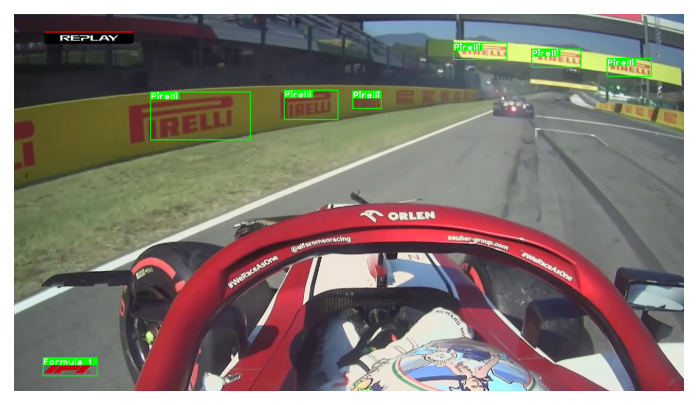

In [278]:
plt.imshow(img)
plt.axis('off');

# Convert to YOLO format

In [279]:
def create_dataset(clothing, categories, dataset_type):
    images_path = Path(f"data/video-files/F1/consolidated/images/{dataset_type}")
    images_path.mkdir(parents=True, exist_ok=True)
    labels_path = Path(f"data/video-files/F1/consolidated/labels/{dataset_type}")
    labels_path.mkdir(parents=True, exist_ok=True)
    for img_id, row in enumerate(tqdm(clothing)):
        image_name = f"{img_id}.jpeg"
        #img = cv2.imread('../'+row['filename'])
        #img = cv2.cvtColor(cv2.imread('../'+row['filename']), cv2.COLOR_BGR2RGB)
        #img = urllib.request.urlopen('../'+row["filename"])
        img = Image.open(row['filename'])
        img = img.convert("RGB")
        img.save(str(images_path / image_name), "JPEG")
        label_name = f"{img_id}.txt"
        with (labels_path / label_name).open(mode="w") as label_file:
            for a in row['annotations']:
                for label in a['label']:
                    category_idx = categories.index(label)
                    points = a['points']
                    p1, p2 = points
                    x1, y1 = p1['x'], p1['y']
                    x2, y2 = p2['x'], p2['y']
                    bbox_width = x2 - x1
                    bbox_height = y2 - y1
                    label_file.write(
                    f"{category_idx} {(x1 + x2)/ 2} {(y1 + y2)/ 2} {bbox_width} {bbox_height}\n"
                    #f"{category_idx} {x1 + bbox_width / 2} {y1 + bbox_height / 2} {bbox_width} {bbox_height}\n"
                    )

In [281]:
create_dataset(train, categories, 'train')
create_dataset(val, categories, 'val')






  0%|          | 0/727 [00:00<?, ?it/s]




  0%|          | 1/727 [00:00<01:35,  7.56it/s]




  0%|          | 2/727 [00:00<01:46,  6.80it/s]




  0%|          | 3/727 [00:00<01:40,  7.19it/s]




  1%|          | 4/727 [00:00<01:39,  7.23it/s]




  1%|          | 5/727 [00:00<01:43,  6.97it/s]




  1%|          | 6/727 [00:00<01:38,  7.32it/s]




  1%|          | 7/727 [00:00<01:38,  7.32it/s]




  1%|          | 9/727 [00:01<01:28,  8.16it/s]




  1%|▏         | 10/727 [00:01<01:35,  7.51it/s]




  2%|▏         | 11/727 [00:01<01:32,  7.75it/s]




  2%|▏         | 12/727 [00:01<01:27,  8.15it/s]




  2%|▏         | 13/727 [00:01<01:30,  7.92it/s]




  2%|▏         | 14/727 [00:01<01:43,  6.89it/s]




  2%|▏         | 15/727 [00:02<01:54,  6.22it/s]




  2%|▏         | 16/727 [00:02<01:59,  5.97it/s]




  2%|▏         | 17/727 [00:02<01:51,  6.36it/s]




  2%|▏         | 18/727 [00:02<01:43,  6.82it/s]




  3%|▎         | 19/727 [00:02<01:40,  7.05it/s]




  3%|

 18%|█▊        | 133/727 [00:15<01:19,  7.43it/s]




 18%|█▊        | 134/727 [00:15<01:24,  6.99it/s]




 19%|█▊        | 135/727 [00:15<01:17,  7.62it/s]




 19%|█▉        | 137/727 [00:16<01:09,  8.48it/s]




 19%|█▉        | 138/727 [00:16<01:06,  8.79it/s]




 19%|█▉        | 139/727 [00:16<02:10,  4.51it/s]




 19%|█▉        | 140/727 [00:17<02:28,  3.96it/s]




 19%|█▉        | 141/727 [00:17<02:14,  4.36it/s]




 20%|█▉        | 142/727 [00:17<01:59,  4.89it/s]




 20%|█▉        | 143/727 [00:17<02:01,  4.82it/s]




 20%|█▉        | 144/727 [00:17<01:48,  5.36it/s]




 20%|█▉        | 145/727 [00:17<01:42,  5.68it/s]




 20%|██        | 146/727 [00:17<01:31,  6.35it/s]




 20%|██        | 147/727 [00:18<01:28,  6.59it/s]




 20%|██        | 148/727 [00:18<01:34,  6.11it/s]




 20%|██        | 149/727 [00:18<01:26,  6.68it/s]




 21%|██        | 150/727 [00:18<01:24,  6.85it/s]




 21%|██        | 151/727 [00:18<01:23,  6.87it/s]




 21%|██        | 152/727 [00

 42%|████▏     | 305/727 [00:39<00:47,  8.92it/s]




 42%|████▏     | 306/727 [00:39<00:47,  8.81it/s]




 42%|████▏     | 307/727 [00:39<00:46,  8.95it/s]




 42%|████▏     | 308/727 [00:39<00:54,  7.72it/s]




 43%|████▎     | 310/727 [00:39<00:49,  8.44it/s]




 43%|████▎     | 311/727 [00:39<00:52,  7.96it/s]




 43%|████▎     | 312/727 [00:40<01:01,  6.79it/s]




 43%|████▎     | 313/727 [00:40<01:35,  4.33it/s]




 43%|████▎     | 315/727 [00:40<01:17,  5.35it/s]




 44%|████▎     | 317/727 [00:40<01:07,  6.11it/s]




 44%|████▍     | 319/727 [00:41<01:20,  5.09it/s]




 44%|████▍     | 320/727 [00:41<01:36,  4.23it/s]




 44%|████▍     | 321/727 [00:42<01:59,  3.40it/s]




 44%|████▍     | 322/727 [00:42<02:02,  3.30it/s]




 44%|████▍     | 323/727 [00:42<01:59,  3.39it/s]




 45%|████▍     | 324/727 [00:42<01:54,  3.51it/s]




 45%|████▍     | 325/727 [00:43<01:41,  3.97it/s]




 45%|████▍     | 326/727 [00:43<01:51,  3.58it/s]




 45%|████▍     | 327/727 [00

 59%|█████▉    | 429/727 [01:08<00:44,  6.68it/s]




 59%|█████▉    | 430/727 [01:08<00:40,  7.37it/s]




 59%|█████▉    | 431/727 [01:08<00:39,  7.51it/s]




 59%|█████▉    | 432/727 [01:08<00:38,  7.61it/s]




 60%|█████▉    | 433/727 [01:08<00:40,  7.26it/s]




 60%|█████▉    | 434/727 [01:09<00:44,  6.61it/s]




 60%|█████▉    | 435/727 [01:09<00:45,  6.38it/s]




 60%|█████▉    | 436/727 [01:09<00:42,  6.87it/s]




 60%|██████    | 437/727 [01:09<00:39,  7.40it/s]




 60%|██████    | 439/727 [01:09<00:36,  7.88it/s]




 61%|██████    | 440/727 [01:09<00:34,  8.36it/s]




 61%|██████    | 441/727 [01:09<00:34,  8.32it/s]




 61%|██████    | 442/727 [01:10<00:35,  8.07it/s]




 61%|██████    | 444/727 [01:10<00:32,  8.65it/s]




 61%|██████▏   | 446/727 [01:10<00:29,  9.48it/s]




 61%|██████▏   | 447/727 [01:10<00:29,  9.45it/s]




 62%|██████▏   | 448/727 [01:10<00:30,  9.27it/s]




 62%|██████▏   | 449/727 [01:10<00:33,  8.30it/s]




 62%|██████▏   | 450/727 [01

 78%|███████▊  | 564/727 [01:26<00:20,  7.92it/s]




 78%|███████▊  | 565/727 [01:26<00:20,  7.75it/s]




 78%|███████▊  | 566/727 [01:27<00:21,  7.42it/s]




 78%|███████▊  | 567/727 [01:27<00:20,  7.98it/s]




 78%|███████▊  | 568/727 [01:27<00:19,  8.30it/s]




 78%|███████▊  | 570/727 [01:27<00:17,  8.82it/s]




 79%|███████▊  | 571/727 [01:27<00:18,  8.58it/s]




 79%|███████▊  | 572/727 [01:27<00:17,  8.90it/s]




 79%|███████▉  | 573/727 [01:27<00:17,  8.56it/s]




 79%|███████▉  | 574/727 [01:28<00:18,  8.34it/s]




 79%|███████▉  | 576/727 [01:28<00:18,  8.37it/s]




 79%|███████▉  | 577/727 [01:28<00:18,  8.29it/s]




 80%|███████▉  | 578/727 [01:28<00:18,  8.21it/s]




 80%|███████▉  | 579/727 [01:28<00:17,  8.53it/s]




 80%|███████▉  | 580/727 [01:28<00:24,  5.95it/s]




 80%|███████▉  | 581/727 [01:29<00:24,  5.86it/s]




 80%|████████  | 582/727 [01:29<00:25,  5.64it/s]




 80%|████████  | 583/727 [01:29<00:24,  5.79it/s]




 80%|████████  | 584/727 [01

 98%|█████████▊| 713/727 [01:46<00:01, 10.97it/s]




 98%|█████████▊| 715/727 [01:46<00:01, 11.08it/s]




 99%|█████████▊| 717/727 [01:46<00:00, 11.41it/s]




 99%|█████████▉| 719/727 [01:47<00:00, 11.63it/s]




 99%|█████████▉| 721/727 [01:47<00:00, 11.71it/s]




 99%|█████████▉| 723/727 [01:47<00:00, 11.75it/s]




100%|█████████▉| 725/727 [01:47<00:00, 12.05it/s]




100%|██████████| 727/727 [01:47<00:00,  6.75it/s]





  0%|          | 0/81 [00:00<?, ?it/s]




  2%|▏         | 2/81 [00:00<00:05, 13.27it/s]




  5%|▍         | 4/81 [00:00<00:05, 13.30it/s]




  7%|▋         | 6/81 [00:00<00:05, 13.15it/s]




 10%|▉         | 8/81 [00:00<00:05, 13.08it/s]




 12%|█▏        | 10/81 [00:00<00:05, 13.14it/s]




 15%|█▍        | 12/81 [00:00<00:05, 13.30it/s]




 17%|█▋        | 14/81 [00:01<00:05, 12.98it/s]




 20%|█▉        | 16/81 [00:01<00:05, 12.88it/s]




 22%|██▏       | 18/81 [00:01<00:05, 12.54it/s]




 25%|██▍       | 20/81 [00:01<00:04, 12.30it/s]




 27%|██▋

In [284]:
zip_dir('data/video-files/F1/consolidated/labels/train/', 'data/video-files/F1/consolidated/labels/train_labels.zip')
zip_dir('data/video-files/F1/consolidated/labels/val/', 'data/video-files/F1/consolidated/labels/val_labels.zip')






0it [00:00, ?it/s]




1it [00:00,  2.89it/s]





1it [00:00, 30.89it/s][A


In [285]:
zip_dir('data/video-files/F1/consolidated/images/train/', 'data/video-files/F1/consolidated/images/train.zip')
zip_dir('data/video-files/F1/consolidated/images/val/', 'data/video-files/F1/consolidated/images/val.zip')






0it [00:00, ?it/s]




1it [00:06,  6.37s/it]





0it [00:00, ?it/s]




1it [00:00,  1.53it/s]


In [286]:
import yaml
import ast

dict_file = {'train': '/images/train/',
              'val': 'images/val/',
              'nc': len(categories),
              'names': categories
            }

with open(r'data/video-files/F1/consolidated/data.yaml', 'w') as file:
    documents = yaml.dump(dict_file, file, default_flow_style=False)

In [287]:
# Paso manual, reemplazar esta lista en el yaml file
categories

['Alpinestars',
 'Anadolu Efes S.K.',
 'Arrow Electronics',
 'BMW',
 'BWT AG',
 'Badminton World Federation',
 'Bamilo',
 'Boomerang',
 'British National Party',
 'Canada Revenue Agency',
 'Castrol',
 'Claro',
 'Comboios de Portugal',
 'CrowdStrike',
 'DHL Express',
 'Dallas Mavericks',
 'David Brown Automotive',
 'DuPont',
 'Ediya Coffee',
 'Emirates',
 'Epitech',
 'Esso',
 'ExxonMobil',
 'FedEx',
 'Ferrari',
 'Florence',
 'Formula 1',
 'France 3',
 'France 5',
 'France Télévisions',
 'GoAir',
 'Haas F1 Team',
 'Honda',
 'Ineos',
 'Infiniti',
 'JCB',
 'Jaguar Cars',
 'Land Rover',
 'Lenovo',
 'Liqui Moly',
 "M&M's",
 "Macy's",
 'Make Up For Ever',
 'Marian University',
 'Mercedes-Benz',
 'Michigan Wolverines',
 'Microsoft Corporation',
 'Monster Energy',
 'NatWest',
 'New England Patriots',
 'Oath Keepers',
 'OnePlus',
 'Orlando Science Center',
 'PKN Orlen',
 'Petron Corporation',
 'Petronas',
 'Pirelli',
 'Prince of Wales College',
 'Puma',
 'RCI Banque',
 'Randstad Holding',
 'Red 

In [288]:
from src.fetch_data import *

bucket_name = 'videos-detection'
video_category = 'F1' 
path_file = 'data/video-files/F1/consolidated/data.yaml'
blob_path_video = f'videos_files/{video_category}/consolidated/data.yaml'
fileType = 'application'
chunk_size = 1024 * 1024

upload_file_to_gstore(bucket_name, path_file, blob_path_video, fileType, chunk_size)






  0%|          | 0/1788 [00:00<?, ?it/s]

File size: 1788 bytes







100%|██████████| 1788/1788 [00:01<00:00, 1528.42it/s]

File uploaded


In [37]:
!ls

concatenate_results.py pipeline.py            static
data                   readme.md              yolov5
docs                   requirements.txt
notebooks              src


In [65]:
# from src.fetch_data import *
# from tqdm import tqdm_notebook as tqdm

# bucket_name = 'videos-detection'
# fileType = 'image/jpeg'
# chunk_size = 512 * 512

# for i in tqdm(range(len(train))):
#     path_file = f'data/video-files/F1/consolidated/images/train/{i}.jpeg'
#     blob_path = f'videos_files/F1/consolidated/images/train/{i}.jpeg'
#     if not is_stored(blob_path, bucket_name):
#         #upload_blob(bucket_name, path_file, blob_path, fileType)
#         upload_file_to_gstore(bucket_name, path_file, blob_path, fileType, chunk_size)

In [292]:
from src.fetch_data import *

bucket_name = 'videos-detection'
path_file = 'data/video-files/F1/consolidated/labels/val_labels.zip'
blob_path_video = f'videos_files/F1/consolidated/val_labels.zip'
fileType = 'media'
chunk_size = 1024 * 1024

upload_file_to_gstore(bucket_name, path_file, blob_path_video, fileType, chunk_size)






  0%|          | 0/23513 [00:00<?, ?it/s]

File size: 23513 bytes







100%|██████████| 23513/23513 [00:01<00:00, 18156.00it/s]

File uploaded


In [293]:
from src.fetch_data import *

bucket_name = 'videos-detection'
path_file = 'data/video-files/F1/consolidated/images/val.zip'
blob_path_video = f'videos_files/F1/consolidated/val.zip'
fileType = 'application/x-zip-compressed'
chunk_size = 1024 * 1024

upload_file_to_gstore(bucket_name, path_file, blob_path_video, fileType, chunk_size)






  0%|          | 0/16375329 [00:00<?, ?it/s]

File size: 16375329 bytes







  6%|▋         | 1048576/16375329 [00:01<00:28, 546201.34it/s]




 19%|█▉        | 3145728/16375329 [00:03<00:20, 648506.20it/s]




 38%|███▊      | 6291456/16375329 [00:05<00:12, 788335.41it/s]




 64%|██████▍   | 10485760/16375329 [00:07<00:06, 973466.92it/s]




 96%|█████████▌| 15728640/16375329 [00:09<00:00, 1203050.38it/s]




22020096it [00:11, 1481335.03it/s]                              




29360128it [00:13, 1812973.05it/s]




37748736it [00:15, 2146198.60it/s]




47185920it [00:17, 2581253.60it/s]




57671680it [00:19, 3062311.46it/s]




69206016it [00:21, 3586559.16it/s]




81788928it [00:23, 4149800.44it/s]




95420416it [00:25, 4740532.49it/s]




110100480it [00:27, 5022113.87it/s]




125829120it [00:29, 5674626.17it/s]




142204449it [00:31, 4448271.66it/s]

File uploaded


In [84]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!git checkout ec72eea62bf5bb86b0272f2e65e413957533507f

Clonando en 'yolov5'...
remote: Enumerating objects: 2690, done.
remote: Total 2690 (delta 0), reused 0 (delta 0), pack-reused 2690
Recibiendo objetos: 100% (2690/2690), 5.43 MiB | 2.84 MiB/s, listo.
Resolviendo deltas: 100% (1779/1779), listo.
/Users/julian/Desktop/Projects/DeepLogo/yolov5
HEAD está ahora en ec72eea Merge remote-tracking branch 'origin/master'


In [86]:
!python train.py --img 640 --batch 4 --epochs 30 \
  --data ../data/video-files/F1/consolidated/data.yaml --cfg ./models/yolov5s.yaml --weights yolov5x.pt \
  --name yolov5x --cache

{'lr0': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'giou': 0.05, 'cls': 0.58, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.014, 'hsv_s': 0.68, 'hsv_v': 0.36, 'degrees': 0.0, 'translate': 0.0, 'scale': 0.5, 'shear': 0.0}
Namespace(adam=False, batch_size=4, bucket='', cache_images=True, cfg='./models/yolov5s.yaml', data='../data/video-files/F1/consolidated/data.yaml', device='', epochs=30, evolve=False, img_size=[640], multi_scale=False, name='yolov5x', noautoanchor=False, nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='yolov5x.pt')
Using CPU

Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/

              from  n    params  module                                  arguments                     
  0             -1  1      3520  models.common.Focus                     [3, 32, 3]                    
  1             -1  1     18560  models.common.Conv              

In [73]:
cd yolov5

/Users/julian/Desktop/Projects/DeepLogo/yolov5
